In [1]:
from __future__ import print_function
import pygraphviz as pgv
import pandas as pd
import numpy as np

from genome import Genome

from IPython.display import Image

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float16)
Y = np.array([[0],[1],[1],[0]], dtype=np.float16) 
data = X,Y

In [3]:
class Visualize(object):
    '''
    Mutate Visualization: Using PyGraphViz and Dot Syntax
    '''

    def __init__(self, GENOME):
        self.nodes, self.connections = GENOME

    def create(self):
        '''
        Create a directed graph from a Genome (Genotype)
        '''
        
        # Capture a List of Lists for in/out connections
        connectionList = self.connections[['in','out']].values.tolist()

        # Cluster nodes by type
        sensorNodes = self.nodes.loc[self.nodes.type == ("sensor"),("node")].values.tolist()
        hiddenNodes = self.nodes.loc[self.nodes.type == ("hidden"),("node")].values.tolist()
        outputNodes = self.nodes.loc[self.nodes.type == ("output"),("node")].values.tolist()

        # Create the dot syntax map
        graphString = ("digraph {")
        for ix,ele in enumerate(connectionList):
            graphString += (str(ele[0]) + "->" + str(ele[1]) + ";")
        graphString += ("}")

        # Create the Graph
        G = pgv.AGraph(graphString, strict=True, directed=True, rankdir='LR')
        G.node_attr['shape']='circle'
        #G.add_subgraph(sensorNodes, name='cluster_sensors', label="Sensor Nodes", rank="same")
        #G.add_subgraph(hiddenNodes, name='cluster_hidden', label="Hidden Nodes")
        #G.add_subgraph(outputNodes, name='cluster_output', label="Output Nodes", rank="same")

        # Create a list of all the layers in the nodes DataFrame
        layerList = sorted(self.nodes.layer.unique().tolist())
        # Use the list to create a subgraph for each cluster of nodes in each layer
        for ix,ele in enumerate(layerList):
            # Select the nodes in layer ele as a list
            layerN = self.nodes.loc[self.nodes.layer == ele,("node")].values.tolist()
            # Create a name for a new subgraph
            aName = ("cluster_" + str(ele))
            # Create a label for a new subgraph
            aLabel = ("layer " + str(ele))
            # Add the subgraph to the Graph
            if layerList[-1] == ix:
                G.add_subgraph(layerN, name=aName, label=("output"), rank="same")
            elif layerList[0] == ix:
                G.add_subgraph(layerN, name=aName, label=("sensor"), rank="same")
            else:
                G.add_subgraph(layerN, name=aName, label=aLabel, rank="same")
        
        G.graph_attr.update(dpi="90")
        
        imageResult = G.draw(format='png', prog='dot')

        return imageResult

In [4]:
g = Genome(data)
GENOME = g.create()

In [5]:
for _ in range(100):
    GENOME = g.mutate(GENOME)

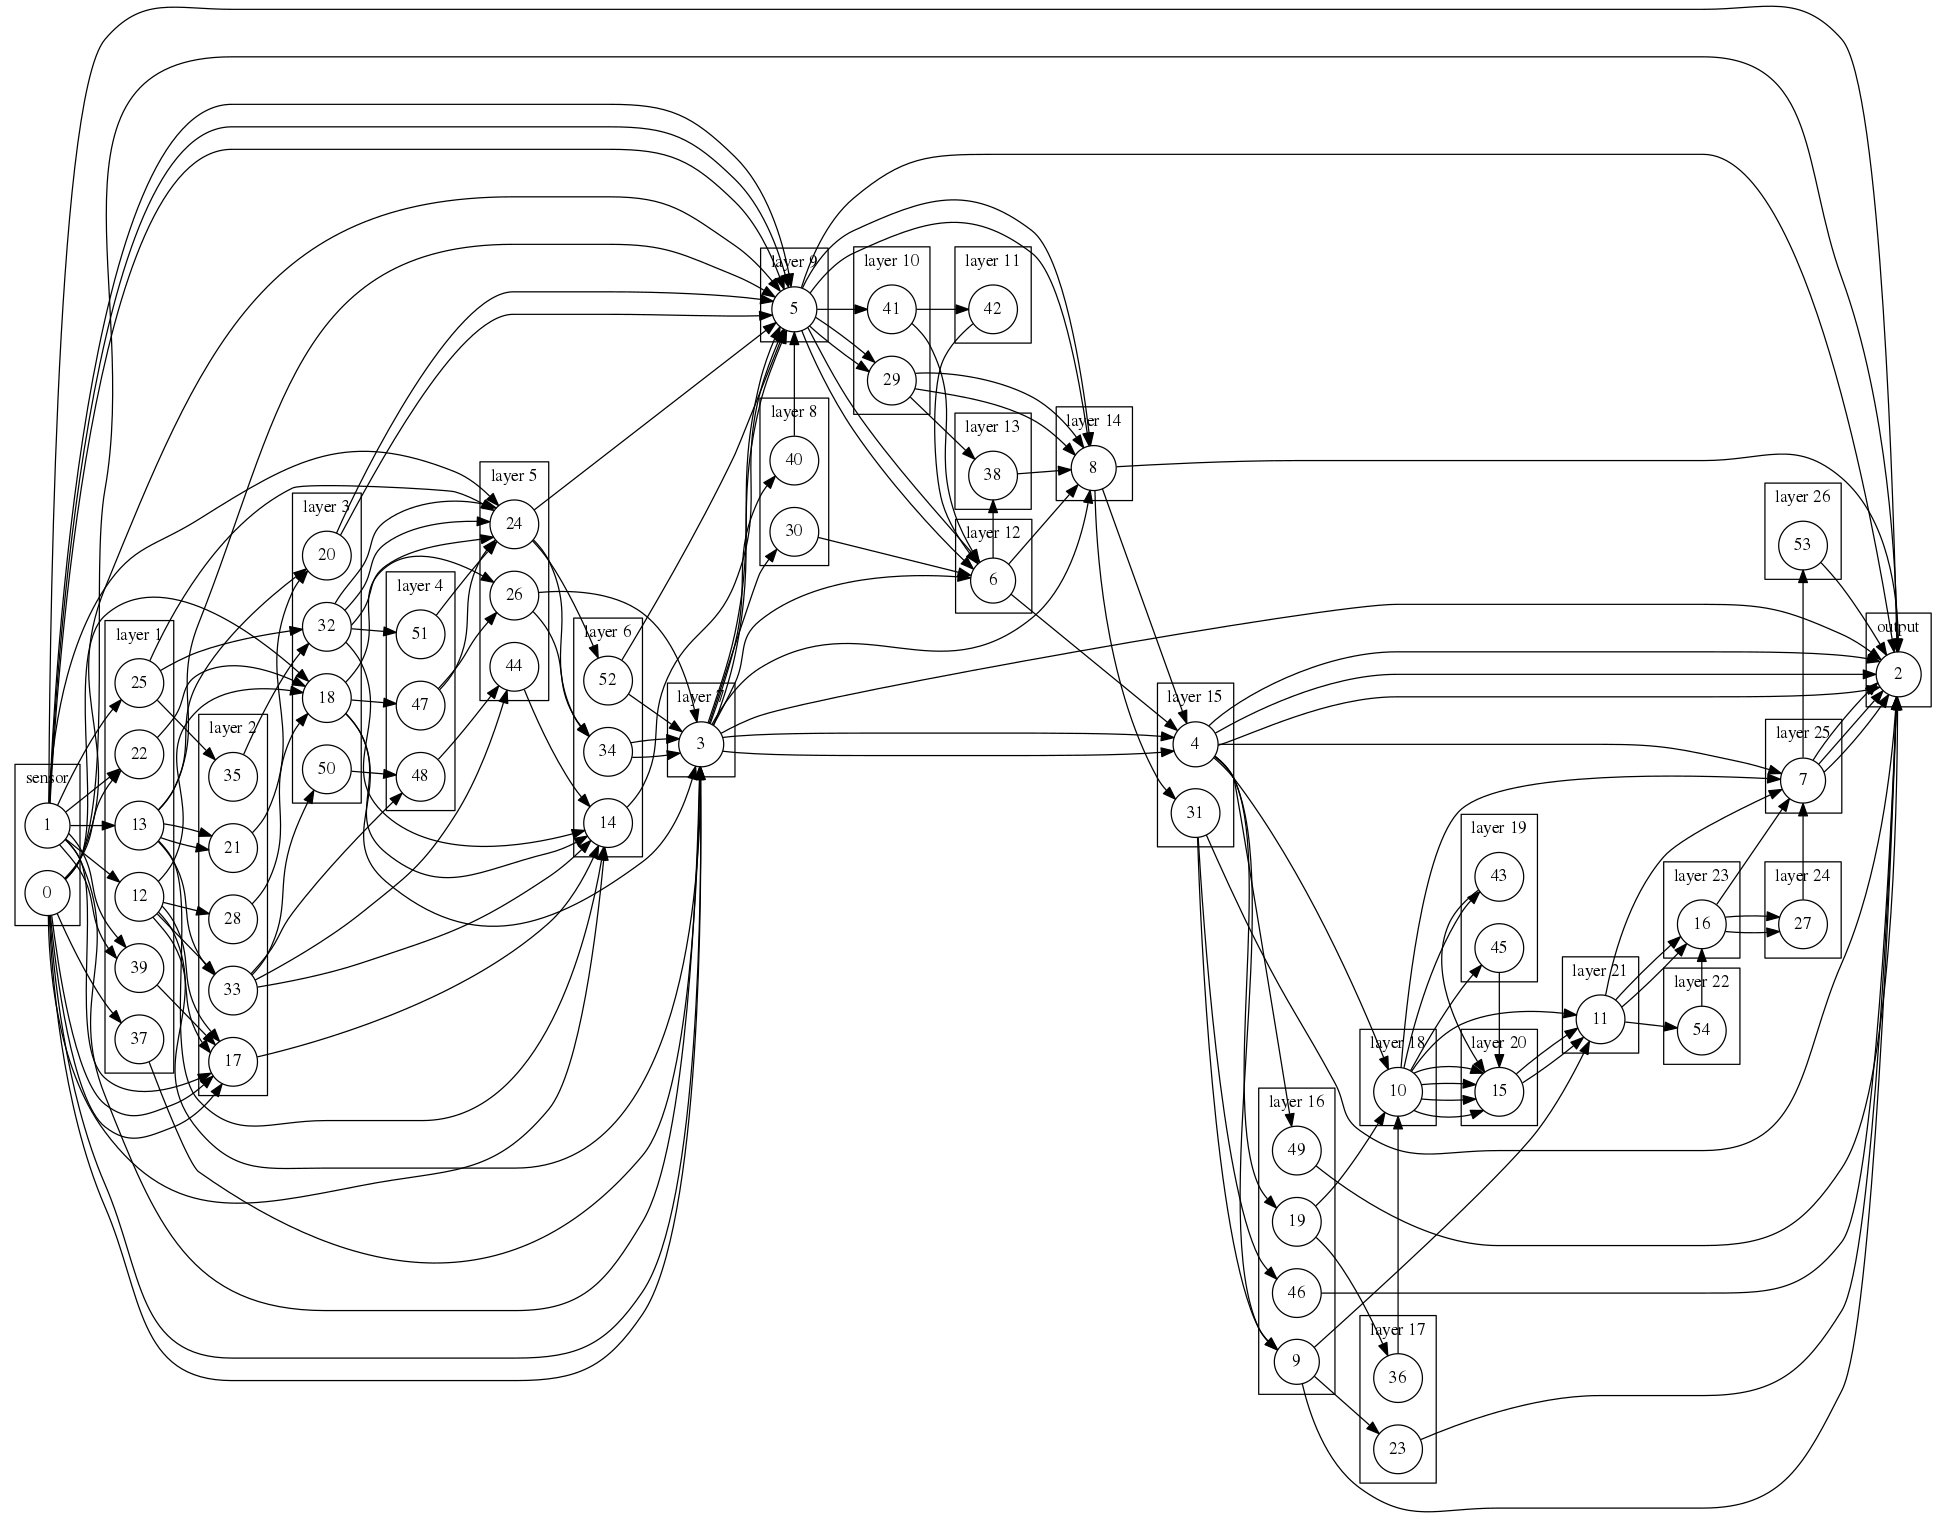

In [6]:
v = Visualize(GENOME)
Image(v.create())